In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import requests
import pysal as ps
from pysal.viz import mapclassify
import palettable as pltt
from seaborn import palplot
import zipfile
import folium  

import matplotlib as mpl
mpl.use('TkAgg')
%matplotlib inline

In [71]:
import requests
import json
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
node["amenity"="bicycle_rental"]["network"="tfl_cycle_hire"];
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [18]:
data

{'version': 0.6,
 'generator': 'Overpass API 0.7.56.2 b688b00f',
 'osm3s': {'timestamp_osm_base': '2020-03-29T15:20:02Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 108539,
   'lat': 51.5291251,
   'lon': -0.0933878,
   'tags': {'amenity': 'bicycle_rental',
    'brand': 'Santander Cycles',
    'brand:wikidata': 'Q807961',
    'brand:wikipedia': 'en:Santander Cycles',
    'capacity': '24',
    'local': 'Hoxton',
    'name': 'Windsor Terrace',
    'network': 'tfl_cycle_hire',
    'official_name': 'Windsor Terrace, Hoxton',
    'official_ref': '30',
    'operator': 'Serco'}},
  {'type': 'node',
   'id': 598093293,
   'lat': 51.5340382,
   'lon': -0.1292443,
   'tags': {'amenity': 'bicycle_rental',
    'brand': 'Santander Cycles',
    'brand:wikidata': 'Q807961',
    'brand:wikipedia': 'en:Santander Cycles',
    'local': "King's Cross",
    'name': 'Pancras Road',
    'n

In [72]:
data['elements']

[{'type': 'node',
  'id': 108539,
  'lat': 51.5291251,
  'lon': -0.0933878,
  'tags': {'amenity': 'bicycle_rental',
   'brand': 'Santander Cycles',
   'brand:wikidata': 'Q807961',
   'brand:wikipedia': 'en:Santander Cycles',
   'capacity': '24',
   'local': 'Hoxton',
   'name': 'Windsor Terrace',
   'network': 'tfl_cycle_hire',
   'official_name': 'Windsor Terrace, Hoxton',
   'official_ref': '30',
   'operator': 'Serco'}},
 {'type': 'node',
  'id': 598093293,
  'lat': 51.5340382,
  'lon': -0.1292443,
  'tags': {'amenity': 'bicycle_rental',
   'brand': 'Santander Cycles',
   'brand:wikidata': 'Q807961',
   'brand:wikipedia': 'en:Santander Cycles',
   'local': "King's Cross",
   'name': 'Pancras Road',
   'network': 'tfl_cycle_hire',
   'official_name': "Pancras Road, King's Cross",
   'official_ref': '34',
   'operator': 'Serco'}},
 {'type': 'node',
  'id': 772536185,
  'lat': 51.5272918,
  'lon': -0.1182352,
  'tags': {'amenity': 'bicycle_rental',
   'brand': 'Santander Cycles',
   'b

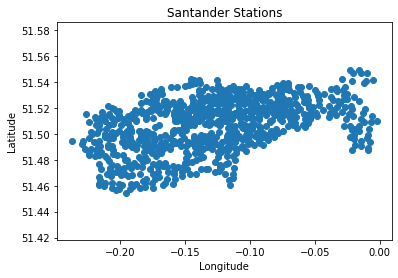

In [73]:
import numpy as np
import matplotlib.pyplot as plt
# Collect coords into list
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))
# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Santander Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [75]:
len(X)

781

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

# Fetch OSM street network from the location
graph = ox.graph_from_place("London, United Kingdom", network_type = 'bike', which_result=2)

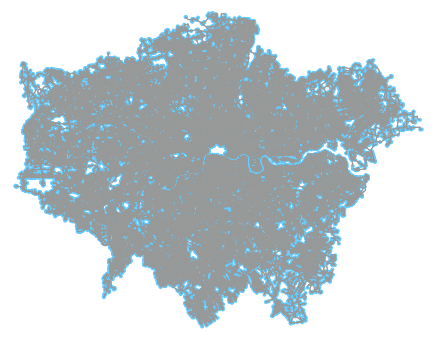

In [90]:
fig, ax = ox.plot_graph(graph)

In [31]:
area = ox.gdf_from_place("London, United Kingdom", which_result=2)

In [50]:
area

,geometry,place_name,bbox_north,bbox_south,bbox_east,bbox_west
0,"POLYGON ((-0.51038 51.46809, -0.51036 51.46795...","London, Greater London, England, United Kingdom",51.691874,51.28676,0.334016,-0.510375


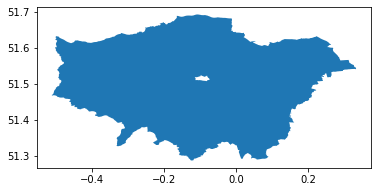

In [33]:
area.plot()

In [18]:
#Two separate santander dataframes are created in order to get around a SettingWithCopyWarning 
#that kept popping up later on. The geometries of santander stations are not only point geometries - there are ten 
#geometries that are polygons. Since point data is needed, these polygons have to be turned into points by calculating
#the polygon's centroid. This is why there is a santander_points and santander_polygons dataframe, which will be
#merged once all santander_polygons are turned into points.

import osmnx as ox
ox.config(log_console=True, use_cache=True)
santander_points = ox.pois.pois_from_address("London, United Kingdom", distance=40000, amenities=['bicycle_rental'])
santander_polygons = ox.pois.pois_from_address("London, United Kingdom", distance=40000, amenities=['bicycle_rental'])
santander_points.columns

Index(['osmid', 'geometry', 'amenity', 'brand', 'brand:wikidata',
       'brand:wikipedia', 'capacity', 'local', 'name', 'network',
       'official_name', 'official_ref', 'operator', 'element_type',
       'created_by', 'not:network', 'shop', 'website', 'historic:ref',
       'start_date', 'wheelchair', 'authority', 'name:de', 'name:el',
       'name:es', 'name:fr', 'name:he', 'name:it', 'name:la', 'name:pt',
       'name:ro', 'name:ru', 'covered', 'image', 'source:capacity', 'history',
       'source', 'flickr', 'wikimedia_commons', 'cyclestreets_id',
       'source:name', 'source:amenity', 'payment:credit_cards',
       'addr:housename', 'addr:postcode', 'addr:street', 'layer', 'note',
       'ref', 'payment:debit_cards', 'payment:cards', 'not:name',
       'opening_hours', 'description', 'fee', 'addr:city', 'dockless',
       'operator:type', 'bicycle_parking', 'natural', 'nodes',
       'addr:housenumber', 'building', 'phone', 'area',
       'payment:american_express', 'payment:ca

In [19]:
len(santander_points)

831

In [20]:
santander_points['network'].unique()

array(['tfl_cycle_hire', nan, 'Brompton Dock', 'Brompton',
       'Brompton Bike Hire', 'Mobike', 'Beryl;Freebike'], dtype=object)

In [21]:
#Filter out for tfl_cycle_hire only as that covers the Santander Bikes

santander_points.drop(santander_points.loc[santander_points['network'] != 'tfl_cycle_hire'].index, inplace=True)
santander_polygons.drop(santander_polygons.loc[santander_polygons['network'] != 'tfl_cycle_hire'].index, inplace=True)

In [22]:
santander_points['network'].unique()

array(['tfl_cycle_hire'], dtype=object)

In [23]:
santander_polygons['network'].unique()

array(['tfl_cycle_hire'], dtype=object)

In [24]:
santander_points.head()

,osmid,geometry,amenity,brand,brand:wikidata,brand:wikipedia,capacity,local,name,network,...,area,payment:american_express,payment:cash,payment:cryptocurrencies,payment:electronic_purses,payment:jcb,payment:mastercard,payment:visa,payment:visa_debit,payment:visa_electron
108539,108539,POINT (-0.09339 51.52913),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,24,Hoxton,Windsor Terrace,tfl_cycle_hire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598093293,598093293,POINT (-0.12924 51.53404),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,NaN,King's Cross,Pancras Road,tfl_cycle_hire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772536185,772536185,POINT (-0.11824 51.52729),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,21,Clerkenwell,Ampton Street,tfl_cycle_hire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772541878,772541878,POINT (-0.09084 51.52583),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,NaN,St. Luke's,Bath Street,tfl_cycle_hire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
781506147,781506147,POINT (-0.12106 51.53002),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,NaN,King's Cross,St. Chad's Street,tfl_cycle_hire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#As mentioned before - some geometries are polygons

santander_points['geometry'].geom_type.unique()

array(['Point', 'Polygon'], dtype=object)

In [26]:
#Ensure santander_points only includes points. Polygons will be dealt with later. Turn shapely geometry object into 
#lat and long columns. This is necessary to create a network later on.

santander_points.drop(santander_points.loc[santander_points['geometry'].geom_type != 'Point'].index, inplace=True)

santander_points['lon'] = santander_points['geometry'].x
santander_points['lat'] = santander_points['geometry'].y

In [27]:
#create a dataframe with polygons only
santander_polygons.drop(santander_polygons.loc[santander_polygons['geometry'].geom_type != 'Polygon'].index, inplace=True)

In [28]:
santander_points.head()

,osmid,geometry,amenity,brand,brand:wikidata,brand:wikipedia,capacity,local,name,network,...,payment:cash,payment:cryptocurrencies,payment:electronic_purses,payment:jcb,payment:mastercard,payment:visa,payment:visa_debit,payment:visa_electron,lon,lat
108539,108539,POINT (-0.09339 51.52913),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,24,Hoxton,Windsor Terrace,tfl_cycle_hire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.093388,51.529125
598093293,598093293,POINT (-0.12924 51.53404),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,NaN,King's Cross,Pancras Road,tfl_cycle_hire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.129244,51.534038
772536185,772536185,POINT (-0.11824 51.52729),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,21,Clerkenwell,Ampton Street,tfl_cycle_hire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.118235,51.527292
772541878,772541878,POINT (-0.09084 51.52583),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,NaN,St. Luke's,Bath Street,tfl_cycle_hire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.090836,51.525828
781506147,781506147,POINT (-0.12106 51.53002),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,NaN,King's Cross,St. Chad's Street,tfl_cycle_hire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.121057,51.530015


In [29]:
santander_polygons.head()

,osmid,geometry,amenity,brand,brand:wikidata,brand:wikipedia,capacity,local,name,network,...,area,payment:american_express,payment:cash,payment:cryptocurrencies,payment:electronic_purses,payment:jcb,payment:mastercard,payment:visa,payment:visa_debit,payment:visa_electron
240639748,240639748,"POLYGON ((-0.01335 51.52891, -0.01331 51.52891...",bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,24,Bow,Bromley High Street,tfl_cycle_hire,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285588652,285588652,"POLYGON ((-0.08637 51.53428, -0.08640 51.53428...",bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,30,Hoxton,Shoreditch Park,tfl_cycle_hire,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383309239,383309239,"POLYGON ((-0.21745 51.50412, -0.21741 51.50413...",bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,24,Shepherd's Bush,Woodstock Grove,tfl_cycle_hire,...,yes,yes,no,no,no,yes,yes,yes,yes,yes
394994570,394994570,"POLYGON ((-0.04102 51.52257, -0.04176 51.52243...",bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,44,Mile End,Queen Mary's,tfl_cycle_hire,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403615731,403615731,"POLYGON ((-0.06779 51.50480, -0.06777 51.50483...",bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,20,Wapping,Wapping High Street,tfl_cycle_hire,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
len(santander_points)

781

In [32]:
#Turn polygons into centroids. Geometry is now point geometry.

import shapely

# copy santander_polygons to new GeoDataFrame
points = santander_polygons.copy()
# change the geometry
points.geometry = points['geometry'].centroid
# same crs
points.crs =santander_polygons.crs
points

,osmid,geometry,amenity,brand,brand:wikidata,brand:wikipedia,capacity,local,name,network,...,area,payment:american_express,payment:cash,payment:cryptocurrencies,payment:electronic_purses,payment:jcb,payment:mastercard,payment:visa,payment:visa_debit,payment:visa_electron
240639748,240639748,POINT (-0.01334 51.52883),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,24,Bow,Bromley High Street,tfl_cycle_hire,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285588652,285588652,POINT (-0.08638 51.53417),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,30,Hoxton,Shoreditch Park,tfl_cycle_hire,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383309239,383309239,POINT (-0.21741 51.50409),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,24,Shepherd's Bush,Woodstock Grove,tfl_cycle_hire,...,yes,yes,no,no,no,yes,yes,yes,yes,yes
394994570,394994570,POINT (-0.04138 51.52249),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,44,Mile End,Queen Mary's,tfl_cycle_hire,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403615731,403615731,POINT (-0.06766 51.50478),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,20,Wapping,Wapping High Street,tfl_cycle_hire,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411082088,411082088,POINT (-0.06961 51.52819),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,32,Bethnal Green,Wellington Row,tfl_cycle_hire,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454892954,454892954,POINT (-0.08341 51.52965),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,25,Hoxton,Fanshaw Street,tfl_cycle_hire,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
475261122,475261122,POINT (-0.02586 51.50931),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,41,Limehouse,Westferry DLR,tfl_cycle_hire,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585788563,585788563,POINT (-0.13323 51.51254),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,16,Soho,Wardour Street,tfl_cycle_hire,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
656126517,656126517,POINT (-0.16827 51.46239),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,NaN,Clapham Junction,St. John's Road,tfl_cycle_hire,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#Turn point geometry into columns with lat and long values. All polygons are now points and the dataframe is ready
#to be concatenated

points['lon'] = points['geometry'].x
points['lat'] = points['geometry'].y

In [34]:
#concatenate updated points dataframe (ex santander_polygons dataframe) with santander_points. We now have a 
#dataframe with all santander cycle dock locations in lat and long format.

to_concat = [santander_points, points]

santander_all_points = pd.concat(to_concat)

santander_all_points.head()

,osmid,geometry,amenity,brand,brand:wikidata,brand:wikipedia,capacity,local,name,network,...,payment:cash,payment:cryptocurrencies,payment:electronic_purses,payment:jcb,payment:mastercard,payment:visa,payment:visa_debit,payment:visa_electron,lon,lat
108539,108539,POINT (-0.09339 51.52913),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,24,Hoxton,Windsor Terrace,tfl_cycle_hire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.093388,51.529125
598093293,598093293,POINT (-0.12924 51.53404),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,NaN,King's Cross,Pancras Road,tfl_cycle_hire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.129244,51.534038
772536185,772536185,POINT (-0.11824 51.52729),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,21,Clerkenwell,Ampton Street,tfl_cycle_hire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.118235,51.527292
772541878,772541878,POINT (-0.09084 51.52583),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,NaN,St. Luke's,Bath Street,tfl_cycle_hire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.090836,51.525828
781506147,781506147,POINT (-0.12106 51.53002),bicycle_rental,Santander Cycles,Q807961,en:Santander Cycles,NaN,King's Cross,St. Chad's Street,tfl_cycle_hire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.121057,51.530015


In [35]:
# Select useful cols and print
cols = ['geometry', 'local', 'official_name', 'official_ref', 'lon', 'lat']
# Print only selected cols
santander_reduced = santander_all_points[cols]
santander_reduced.head()

,geometry,local,official_name,official_ref,lon,lat
108539,POINT (-0.09339 51.52913),Hoxton,"Windsor Terrace, Hoxton",30,-0.093388,51.529125
598093293,POINT (-0.12924 51.53404),King's Cross,"Pancras Road, King's Cross",34,-0.129244,51.534038
772536185,POINT (-0.11824 51.52729),Clerkenwell,"Ampton Street, Clerkenwell",26,-0.118235,51.527292
772541878,POINT (-0.09084 51.52583),St. Luke's,"Bath Street, St. Luke's",119,-0.090836,51.525828
781506147,POINT (-0.12106 51.53002),King's Cross,"St. Chad's Street, King's Cross",4,-0.121057,51.530015


In [44]:
#SAVE IT
santander_reduced.to_file("santander_nodes.shp")

# Prepare Edge data


In [12]:
import pandas as pd
import csv 

#Load in May 2019 Data
may1 = pd.read_csv('Santander Bike Journey Data/160JourneyDataExtract01May2019-07May2019.csv')
may2 = pd.read_csv('Santander Bike Journey Data/161JourneyDataExtract08May2019-14May2019.csv')
may3 = pd.read_csv('Santander Bike Journey Data/162JourneyDataExtract15May2019-21May2019.csv')
may4 = pd.read_csv('Santander Bike Journey Data/163JourneyDataExtract22May2019-28May2019.csv')
may5 = pd.read_csv('Santander Bike Journey Data/may5.csv') #this one was manually filtered for May only (it went through to June)

#Concatenate
frames = [may1, may2, may3, may4, may5]

result = pd.concat(frames)
len(result)

995968

In [14]:
result.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
0,86539944,180,16202,05/05/2019 10:11,446,"York Hall, Bethnal Green",05/05/2019 10:08,719,"Victoria Park Road, Hackney Central"
1,86585923,240,14673,07/05/2019 07:24,578,"Hollybush Gardens, Bethnal Green",07/05/2019 07:20,719,"Victoria Park Road, Hackney Central"
2,86609010,780,10885,07/05/2019 18:02,40,"Commercial Street, Shoreditch",07/05/2019 17:49,719,"Victoria Park Road, Hackney Central"
3,86563700,240,7782,06/05/2019 10:03,39,"Shoreditch High Street, Shoreditch",06/05/2019 09:59,702,"Durant Street, Bethnal Green"
4,86498870,300,7846,03/05/2019 11:17,39,"Shoreditch High Street, Shoreditch",03/05/2019 11:12,702,"Durant Street, Bethnal Green"


In [18]:
#Duration is in seconds. The longest time a bicycle was rented out for was over 6 days

result['Duration'].max()/60/60/24

6.472222222222222

In [8]:
result.to_csv('journey_data_to_check.csv')

In [20]:
#Split duration into short journeys (<15mins), commuter journeys (<60mins), long journeys (<=12hrs), day journeys (<=24hrs), multiple day journeys

short_journey_df = result.loc[result['Duration'] <= 900]
commuter_journey_df = result.loc[(result['Duration'] > 900) & (result['Duration'] <= 3600)]
long_journey_df = result.loc[(result['Duration'] > 3600) & (result['Duration'] <= 43200)]
day_journey_df = result.loc[(result['Duration'] > 43200) & (result['Duration'] <= 86400)]
multiday_journey_df = result.loc[result['Duration'] > 86400]

In [22]:
#Get edges and their weights
all_journeys = result.groupby(['StartStation Id','EndStation Id']).size().to_frame('count').reset_index()
short_journeys = short_journey_df.groupby(['StartStation Id','EndStation Id']).size().to_frame('count').reset_index()
commuter_journeys = commuter_journey_df.groupby(['StartStation Id','EndStation Id']).size().to_frame('count').reset_index()
long_journeys = long_journey_df.groupby(['StartStation Id','EndStation Id']).size().to_frame('count').reset_index()
day_journeys = day_journey_df.groupby(['StartStation Id','EndStation Id']).size().to_frame('count').reset_index()
multiday_journeys = multiday_journey_df.groupby(['StartStation Id','EndStation Id']).size().to_frame('count').reset_index()
short_journeys.head()

,StartStation Id,EndStation Id,count
0,1,1,16
1,1,3,3
2,1,4,2
3,1,9,2
4,1,11,4


In [23]:
#export
short_journeys.to_csv('short_journeys.csv')
commuter_journeys.to_csv('commuter_journeys.csv')
long_journeys.to_csv('long_journeys.csv')
day_journeys.to_csv('day_journeys.csv')
multiday_journeys.to_csv('multiday_journeys.csv')
all_journeys.to_csv('all_journeys.csv')